### LINEAR REGRESSION

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [8]:
lung=pd.read_csv("LungCapData.csv")


In [9]:
lung

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [10]:
lung.isnull().sum()[lung.isnull().sum()>0]

Series([], dtype: int64)

In [11]:
lung.Smoke.replace({'no':0,'yes':1},inplace=True)
lung.Gender.replace({'male':1,'female':0},inplace=True)
lung.Caesarean.replace({'no':0,'yes':1},inplace=True)

In [12]:
lung

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0
...,...,...,...,...,...,...
720,5.725,9,56.0,0,0,0
721,9.050,18,72.0,1,1,1
722,3.850,11,60.5,1,0,0
723,9.825,15,64.9,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
lung_train,lung_test=train_test_split(lung,test_size=.2)

In [19]:
lung_train_x=lung_train.iloc[::,1:]
lung_train_y=lung_train.iloc[::,0]


In [16]:
lung_test_x=lung_test.iloc[::,1:]
lung_test_y=lung_test.iloc[::,0]

In [21]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [22]:
linreg.fit(lung_train_x,lung_train_y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [23]:
linreg.score(lung_train_x,lung_train_y)

0.8519285341820657

In [24]:
lung_train_x.shape[0]

580

In [25]:
lung_train_x.shape[1]

5

In [26]:
Rsquare=linreg.score(lung_train_x,lung_train_y)
n=lung_train_x.shape[0]
k=lung_train_x.shape[1]

adjrsquare=1-(1-Rsquare)*(n-1)/(n-k-1)
adjrsquare

0.8506387130512475

In [27]:
linreg.intercept_

np.float64(-11.251321410673429)

In [28]:
linreg.coef_

array([ 0.15983046,  0.26293429, -0.63241938,  0.38691663, -0.14824439])

In [30]:
pred_train=linreg.predict(lung_train_x)
pred_test=linreg.predict(lung_test_x)

In [31]:
err_train=lung_train_y-pred_train

In [32]:
err_train

2      0.065758
264   -0.044183
141   -0.367668
458   -0.854989
347   -0.103030
         ...   
163    0.035585
543   -1.565153
321    0.951683
382    1.249435
239    1.314724
Name: LungCap, Length: 580, dtype: float64

In [33]:
err_train.mean()

np.float64(3.877358204621926e-15)

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


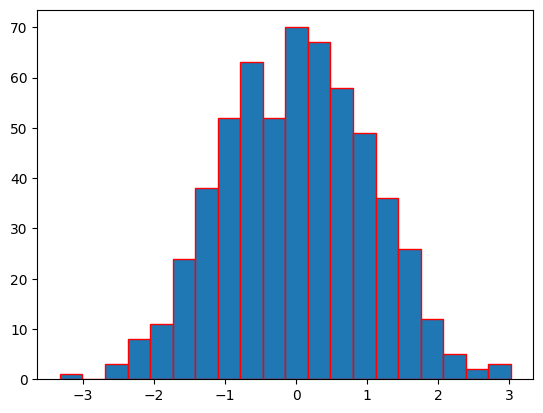

In [37]:
plt.hist(err_train,edgecolor='red',bins=20);

In [38]:
err_train.skew()

np.float64(-0.004833260792057903)

In [39]:
err_train.kurtosis()+3

np.float64(2.7340173531827334)

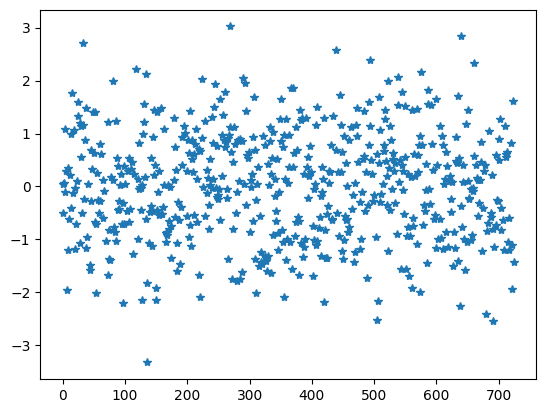

In [40]:
plt.plot(err_train,'*')


In [41]:
pred_act=pd.DataFrame()
pred_act['Actual']=lung_train_y
pred_act['Pred']=pred_train

<Axes: xlabel='Actual', ylabel='Pred'>

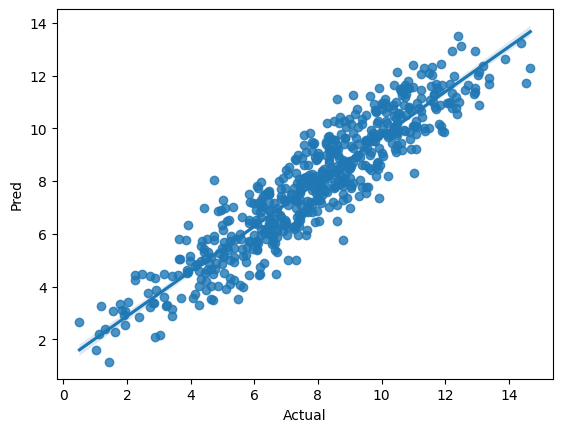

In [45]:
sns.regplot(x='Actual',y='Pred',data=pred_act)

In [46]:
err_test=lung_test_y-pred_test
err_test

67     0.303326
557   -0.712030
500    0.792094
7     -2.079305
467    1.029833
         ...   
298   -0.193528
627    0.280971
286    0.596066
579    0.695808
618   -0.452764
Name: LungCap, Length: 145, dtype: float64

In [47]:
import numpy as np

In [48]:
mse=np.mean(np.square(err_test))
mse

np.float64(1.0015825362068713)

In [50]:
mape=np.mean(np.abs(err_test*100/lung_test_y))

In [51]:
mape

np.float64(12.386280828345354)

In [54]:
acc=100-mape

In [55]:
acc

np.float64(87.61371917165465)